In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

The dataset I am using is from "players.csv". It was collected by a research group in Computer Science at UBC from players in a Minecraft server created by the research group. It covers 196 observations from players over 7 variables. 

"players.csv"
Character type variables
- experience: The player's experience in minecraft
- name: The name of the player
- hashedEmail: The player's email
- gender: The gender of the player

Double type variables
- played_hours: The number of hours played by the player, mean = 5.85 hours
- Age: The age of the player, mean = 21 years
        
Integer type variables
- subscribe: Whether the player has subscribed to the games-related newsletter

I noticed that name and hashedEmail are not important predictor variables. In gender, it may be difficult to predict, as there are people who also prefer not to say what they present as. In the dataset, Age is also written as a dbl type variable, however Age is usually written as an integer rather than a decimal.

"sessions.csv"

It covers 1535 observations from players over 5 variables. 

Character type variables
- hashedEmail: the player's email
- start_time: date and time at the start of playing
- end_time: date and time at the end of playing

Double type variables
- original_start_time: start time of player in milliseconds
- original_end_time: end time of player in milliseconds

In [16]:
players <- read_csv("data/players.csv") |>
    arrange(desc(played_hours)) |>
    mutate(Age = as.integer(Age))
sessions <- read_csv("data/sessions.csv")

players


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<int>
Regular,TRUE,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,223.1,Hiroshi,Male,17
Regular,TRUE,b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319,218.1,Akio,Non-binary,20
Regular,TRUE,ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,178.2,Piper,Female,19
Amateur,TRUE,f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,150.0,Delara,Female,16
Amateur,TRUE,fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,56.1,Dana,Male,23
Amateur,TRUE,36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,53.9,Alex,Male,17
Amateur,TRUE,a175d4741dc84e6baf77901f6e8e0a06f54809a34e6b5211159bced346f7fb3e,48.4,Xander,Female,17
Amateur,TRUE,24d4892c2c3ce11d3e54c3bf31ee218901cac7a2f564911d67424c8fdf0874fe,32.0,Sidney,Male,22
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9


In [4]:
player_summary <- summary(players)
player_summary 

sessions_summary <- summary(sessions)


  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

I am choosing Question 2: We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts. More specifically, I want to know if the experience and age of a player and can produce the largest amount of data in the players.csv dataset?”. The main variables I from my dataset are experience, played_hours, and Age, and so I am using the players.csv dataset.



Players less than 30 years old would give the most data. I would choose Amateur players as they seem to have the most variety in hours, and it would prove to be the most useful when collecting data. I found that the dataset consisted mostly of Amateur players.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


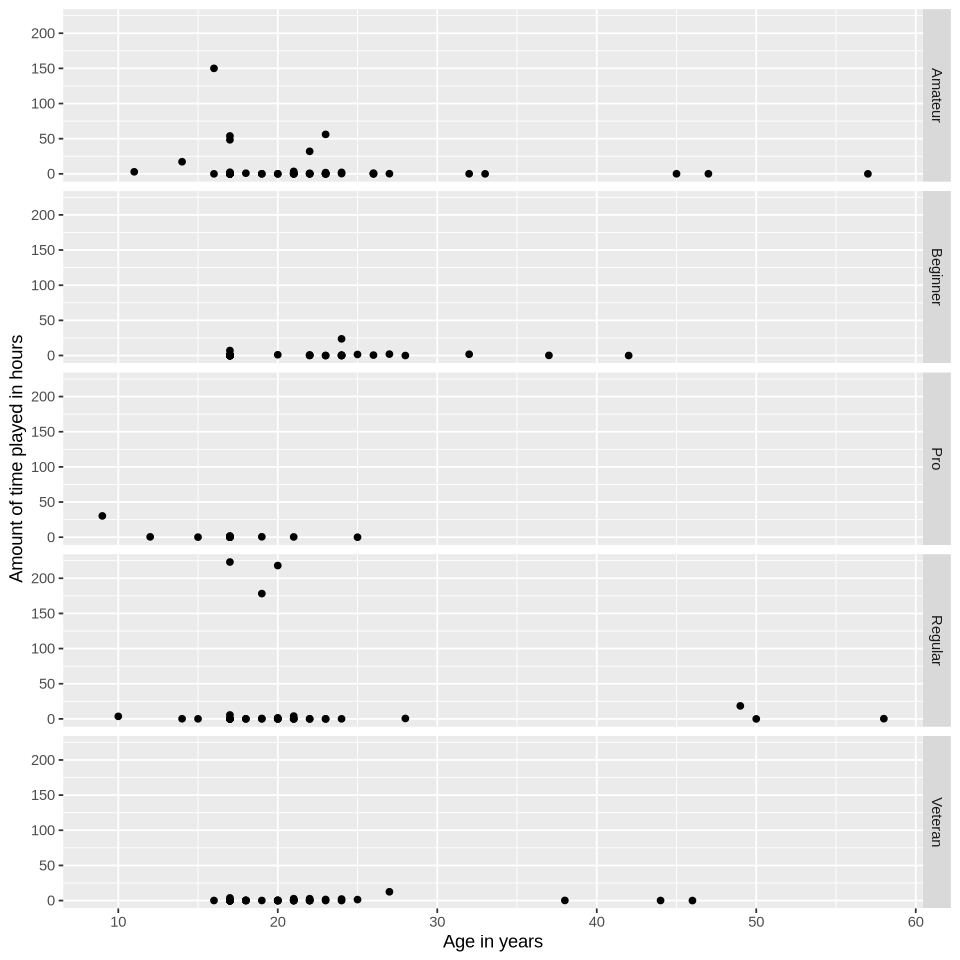

In [14]:
options(repr.plot.width = 8, repr.plot.height = 8)

players_filter <- players |>
    ggplot(aes(x = Age, y = played_hours)) +
    geom_point() +
    xlab("Age in years") +
    ylab("Amount of time played in hours") + 
  facet_grid(rows = vars(experience)) 

players_filter





In [7]:
players_sort <- players |>
    filter(gender == "Male") |>
    filter(Age < 30) |>
    group_by(experience) |>
    summarize(avg_played_hours = mean(played_hours))


players_sort

experience,avg_played_hours
<chr>,<dbl>
Amateur,4.552632
Beginner,2.253333
Pro,3.290909
Regular,10.395652
Veteran,0.300000


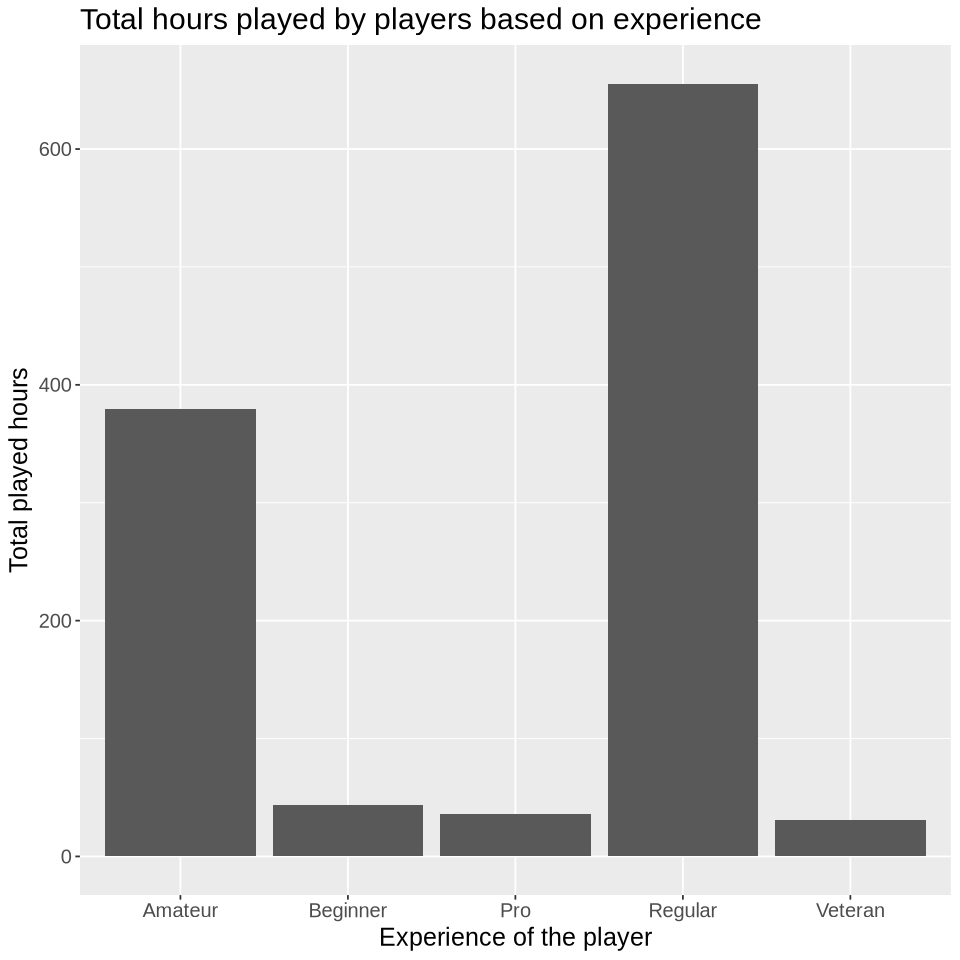

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


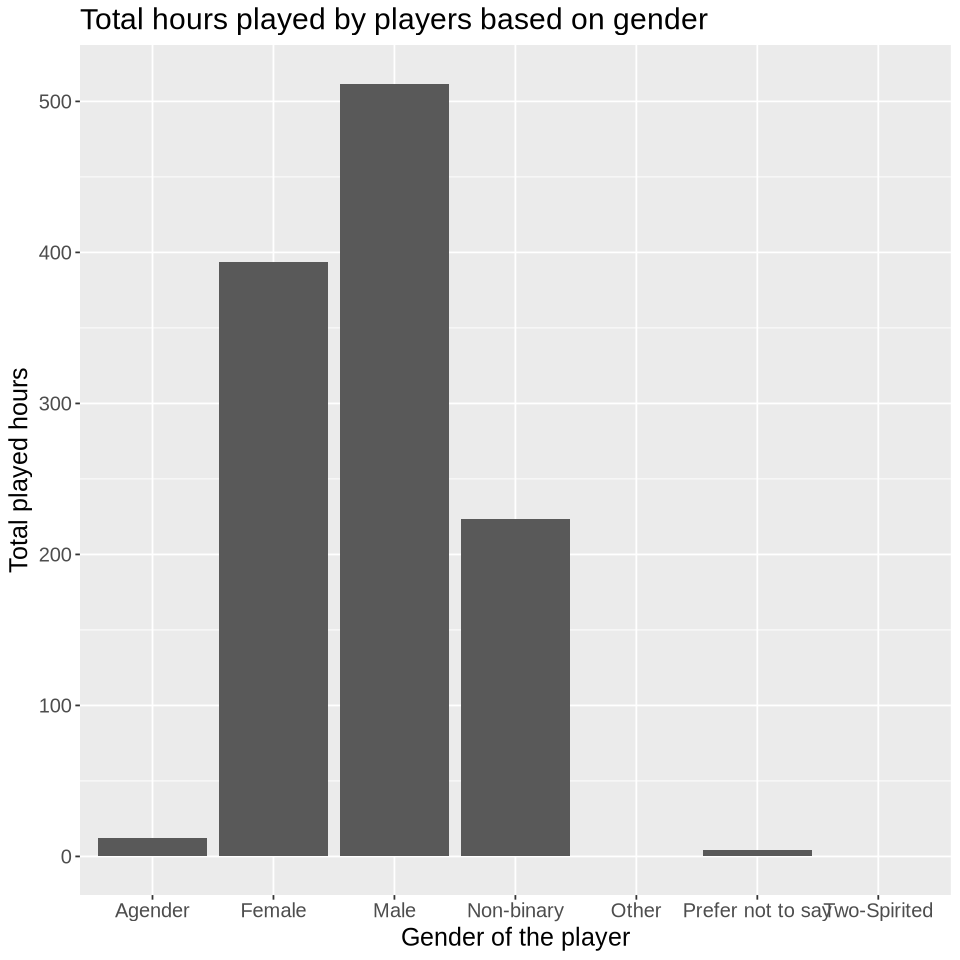

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


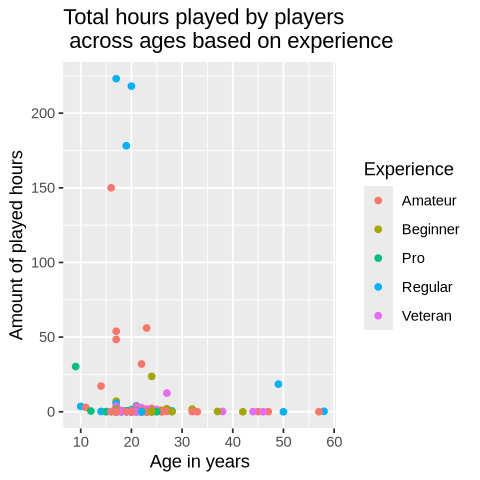

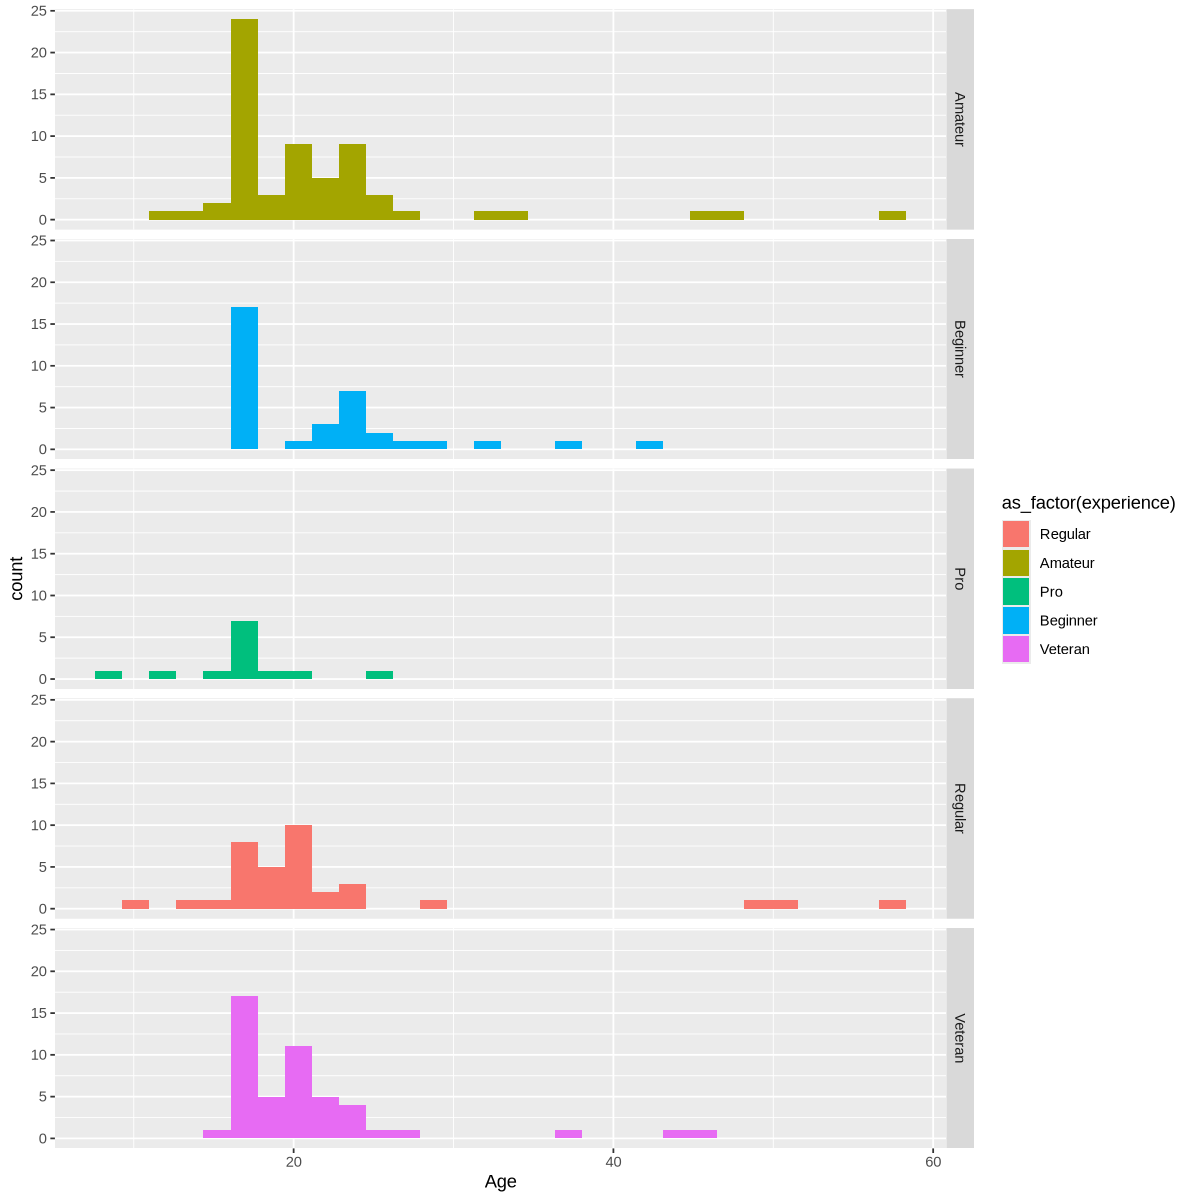

In [39]:
options(repr.plot.width = 8, repr.plot.height = 8) 

players_plot <- players |> 
    ggplot(aes(x = experience, y = played_hours)) + 
    geom_bar(stat = "identity") + 
    labs(x = "Experience of the player", y = "Total played hours", title = "Total hours played by players based on experience") +  
    theme(text = element_text(size = 15))  
players_plot 

  

players_gender <- players |> 
    ggplot(aes(x = gender, y = played_hours)) + 
    geom_bar(stat = "identity") + 
    labs(x = "Gender of the player", y = "Total played hours", title = "Total hours played by players based on gender") +  
    theme(text = element_text(size = 15))  
players_gender 

  

options(repr.plot.width = 4, repr.plot.height = 4) 
mc_plot <- players |> 
    ggplot(aes(x = Age, y = played_hours, color = experience)) + 
    geom_point() + 
    labs(x = "Age in years", y = "Amount of played hours", color = "Experience", title = "Total hours played by players\n across ages based on experience")   
mc_plot 


options(repr.plot.width = 10, repr.plot.height = 10) 
mc_hist <- ggplot(players, aes(x = Age, fill = as_factor(experience))) +  
  geom_histogram() +  
  facet_grid(rows = vars(experience))  

  
mc_hist  